In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Concrete_Data.xls')

In [3]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [6]:
orig_cols = list(df.columns)

In [9]:
new_cols = ['comp_1_cement','comp_2_BFS','comp_3_fly_ash','comp_4_water',
            'comp_5_superplasticizer','comp_6_coarse_agg','comp_7_fine_agg',
           'age_in_days','concrete_compressive_strength']
df.set_axis(new_cols, axis=1,inplace=True)

In [16]:
time_points = [1,7,14,28]
selected_days = []
for i in time_points:
    selected_days.append(df[df['age_in_days']==i])

In [19]:
select_days_df = pd.concat(selected_days)

In [32]:

strength_dict = {i:select_days_df[select_days_df['age_in_days']==i]['concrete_compressive_strength'].mean() for i in time_points}
strength_dict


{1: 9.452715959999999,
 7: 26.050623361474695,
 14: 28.751037994193556,
 28: 36.748480284084714}

In [54]:
def plot_outliers(df):
    plt.figure(figsize=(12,40))
    i=0
    for col in list(df.columns)[:-1]:
        i+=1
        plt.subplot(10,4,i)
        plt.boxplot(df[col])
        plt.title(col)
        
        

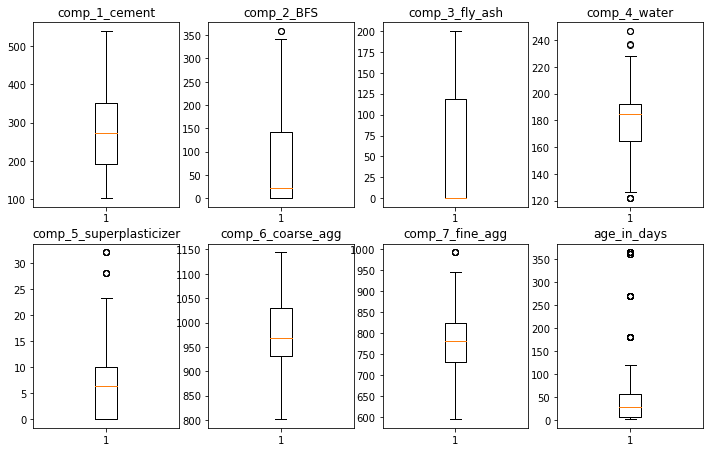

In [55]:
plot_outliers(df)

In [56]:
final_df = df[df['age_in_days']<150]

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = final_df.drop(columns = ['concrete_compressive_strength'])
y = final_df['concrete_compressive_strength']

X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7537555137143304

In [64]:
preds = lr.predict(X_test)

from sklearn.metrics import r2_score
r2_score(preds,y_test)

0.6754996644020047